Q1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.
- K-Means Clustering

    A partition-based clustering algorithm

    Divides data into K predefined clusters

    Uses centroids and minimizes within-cluster variance

    Requires the number of clusters K in advance

    Efficient and scalable for large datasets

    - Use Case

        Customer segmentation in e-commerce where the number of segments is known (e.g., budget, regular, premium customers)

- Hierarchical Clustering

    A tree-based clustering method (dendrogram)

    No need to predefine number of clusters

    Two types:

    Agglomerative (bottom-up)

    Divisive (top-down)

    Computationally expensive for large datasets

   - Use Case
      
      Document or gene clustering where understanding cluster relationships is important.

Q2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
- The Silhouette Score measures how well data points are clustered.

- Formula intuition:

    Measures cohesion (within-cluster distance)

    Measures separation (distance from other clusters)

- Score Range:

    +1 → Well-separated clusters

    0 → Overlapping clusters

    −1 → Incorrect clustering

- Purpose

    Compare clustering quality

    Select the optimal number of clusters

    Works with K-Means, DBSCAN, Agglomerative, etc.

Q3: What are the core parameters of DBSCAN, and how do they influence the clustering process?
1. eps (epsilon)

    Radius around a data point

    Determines neighborhood size

2. min_samples

    Minimum points needed to form a dense region

- Influence:

    Large eps → fewer clusters, more merging

    Small eps → more noise

    High min_samples → stricter clustering

Q4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
- Clustering algorithms rely on distance calculations.

- Without scaling:

    Features with large values dominate

    Distance becomes misleading

- Algorithms affected:

    K-Means

    DBSCAN

    Hierarchical Clustering

- Solution

    Use StandardScaler or MinMaxScaler

Q5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
- The Elbow Method plots:

    Number of clusters (K)

    Inertia (within-cluster sum of squares)

- The elbow point shows diminishing returns.

- Purpose

    Helps determine the optimal number of clusters                                                                       
              



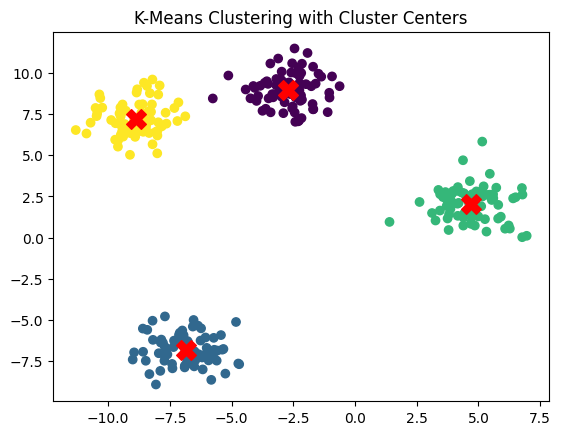

In [1]:
#Dataset: Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified.
#Q6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200)
plt.title("K-Means Clustering with Cluster Centers")
plt.show()


In [4]:
#Q7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load data
wine = load_wine()
X = wine.data

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)


Number of clusters: 0


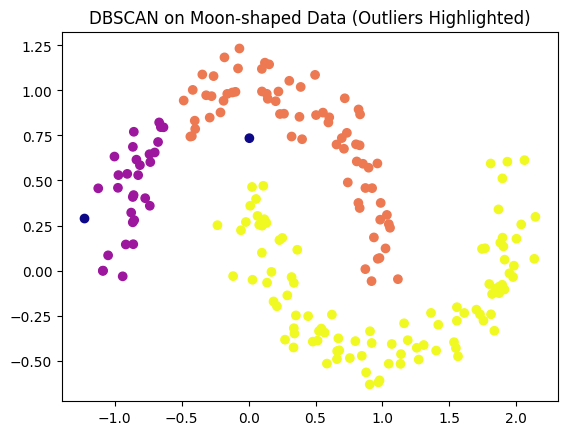

In [5]:
#Q8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma')
plt.title("DBSCAN on Moon-shaped Data (Outliers Highlighted)")
plt.show()


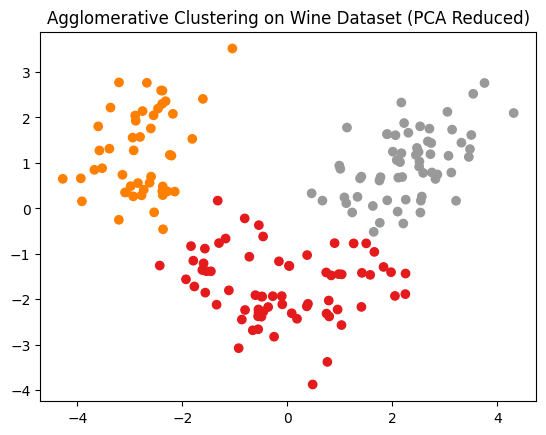

In [6]:
#Q9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set1')
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.show()



Q10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

- Algorithm Choice

    K-Means → scalable and interpretable

    DBSCAN → detect outliers (fraud, rare buyers)

    Hierarchical → explore customer relationships

- Preprocessing

    Handle missing values (mean/median)

    Encode categorical variables

    Apply StandardScaler

- Choosing Number of Clusters

    Elbow Method

    Silhouette Score

    Business interpretability

- Business Benefits

    Personalized promotions

    Improved customer retention

    Better campaign ROI

    Identification of high-value customers

In [7]:
#Q10 Code
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, labels))


Silhouette Score: 0.25422758316007776
